<a href="https://colab.research.google.com/github/AlvianSitohang/Tugas_Python/blob/main/Pertemuan%2010_image%20classification%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [26]:
ls

 3scene@        forest_cdmc281.jpg  'scenes_nn_4 layers.ipynb'
 Alvian.ipynb   nnmodel_scene/


In [27]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [28]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [29]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [30]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [31]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [32]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [33]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 224, 224, 3)
(237, 224, 224, 3)


In [101]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(224*224*3,)),
        Dense(75, activation="relu", name="layer1"),
        Dense(36, activation="relu", name="layer2"),
        Dense(18, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [102]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 150528)            0         
_________________________________________________________________
layer1 (Dense)               (None, 75)                11289675  
_________________________________________________________________
layer2 (Dense)               (None, 36)                2736      
_________________________________________________________________
layer3 (Dense)               (None, 18)                666       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 57        
Total params: 11,293,134
Trainable params: 11,293,134
Non-trainable params: 0
_________________________________________________________________


In [103]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 3s 113ms/step - loss: 7.2878 - accuracy: 0.3924 - val_loss: 5.3440 - val_accuracy: 0.3671
Epoch 2/25
23/23 [==============================] - 2s 104ms/step - loss: 2.6106 - accuracy: 0.5654 - val_loss: 1.1807 - val_accuracy: 0.6793
Epoch 3/25
23/23 [==============================] - 2s 103ms/step - loss: 1.0463 - accuracy: 0.6203 - val_loss: 3.8146 - val_accuracy: 0.5443
Epoch 4/25
23/23 [==============================] - 2s 105ms/step - loss: 2.5121 - accuracy: 0.5373 - val_loss: 1.7972 - val_accuracy: 0.5485
Epoch 5/25
23/23 [==============================] - 2s 103ms/step - loss: 1.7382 - accuracy: 0.5949 - val_loss: 1.4320 - val_accuracy: 0.6667
Epoch 6/25
23/23 [==============================] - 2s 105ms/step - loss: 0.7042 - accuracy: 0.7525 - val_loss: 1.5900 - val_accuracy: 0.6203
Epoch 7/25
23/23 [==============================] - 2s 105ms/step - loss: 1.0976 - accuracy: 0.6793 - val_loss: 2.4576 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


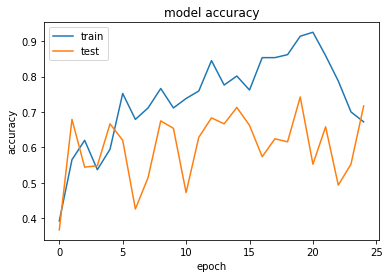

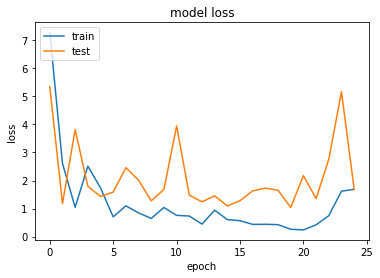

In [105]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [106]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.76      0.68      0.72        87
      forest       0.77      0.71      0.74        84
     highway       0.63      0.77      0.69        66

    accuracy                           0.72       237
   macro avg       0.72      0.72      0.72       237
weighted avg       0.73      0.72      0.72       237



In [39]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [40]:
import cv2
import matplotlib.pyplot as plt
image1='forest_test.jpg'

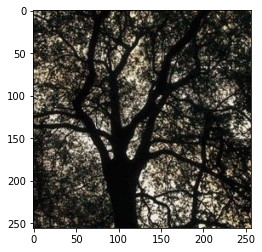

In [41]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [43]:
image_testing = Image.open('forest_test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [44]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)
